In [ ]:
!pip install gensim tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
fake_df=pd.read_csv('/content/drive/MyDrive/fake news detection/Fake.csv')
true_df=pd.read_csv('/content/drive/MyDrive/fake news detection/True.csv')

In [ ]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_df['labels']=0
true_df['labels']=1

In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   labels   23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [ ]:
news_df=pd.concat([fake_df, true_df],ignore_index=True)
news_df

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
news_df=news_df.sample(frac=1).reset_index(drop=True)

In [ ]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def text_preprocessing(text):
  #removing punctuation
  make_trans=text.maketrans('','',string.punctuation)
  text=text.translate(make_trans)
  #Word tokenize
  tokens=word_tokenize(text.lower())
  stopword=set(stopwords.words('english'))
  #removing stopwords
  filter_tokens=[token for token in tokens if token not in stopword]
  lemmatizer=WordNetLemmatizer()
  lemma_lst=[lemmatizer.lemmatize(token) for token in filter_tokens]
  if lemma_lst:
    return wv.get_mean_vector(lemma_lst)
  else:
    return np.zeros(300)

In [ ]:
news_df.drop(columns=['title','date'],inplace=True)

In [ ]:
news_df.head()

,text,subject,labels
0,NEW YORK (Reuters) - Nearly one-fifth of regis...,politicsNews,1
1,"As protests continue across the country, some...",politics,0
2,(Reuters) - A sales consultant told Brazilian ...,politicsNews,1
3,Donald Trump has had a rocky relationship with...,News,0
4,NEW YORK (Reuters) - Palestinian President Mah...,worldnews,1


In [ ]:
news_df['Vectors']=news_df['text'].apply(lambda text: text_preprocessing(text))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news_df['Vectors'], news_df['labels'], test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35918,)
(8980,)
(35918,)
(8980,)


In [ ]:
!pip install tensorflow

In [ ]:
!pip install sequential

  Preparing metadata (setup.py) ... done
  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2858 sha256=fa8b57b231205a57e5f3adb9577c6f621417056e87d6c98bbccf660f3968c76e
  Stored in directory: /root/.cache/pip/wheels/c3/61/56/fe456787532527aafb108ffeceecb4a2e928a518c88bbdd5c5
Successfully built sequential


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model_cnn=Sequential()
model_cnn.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

# Add a max-pooling layer
model_cnn.add(MaxPooling1D(pool_size=2))

# Flatten the output from the previous layer
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))

# Add a dropout layer to prevent overfitting
model_cnn.add(Dropout(0.5))

# Output layer (binary classification, so sigmoid activation)
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
X_test=np.array(X_test.tolist())
X_train=np.array(X_train.tolist())

In [ ]:
model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 232s 203ms/step - accuracy: 0.5122 - loss: 0.6935 - val_accuracy: 0.5258 - val_loss: 0.6918
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 191s 170ms/step - accuracy: 0.5186 - loss: 0.6926 - val_accuracy: 0.5258 - val_loss: 0.6920
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 189s 168ms/step - accuracy: 0.5230 - loss: 0.6922 - val_accuracy: 0.5258 - val_loss: 0.6918
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 209s 174ms/step - accuracy: 0.5173 - loss: 0.6925 - val_accuracy: 0.5258 - val_loss: 0.6918
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 187s 167ms/step - accuracy: 0.5177 - loss: 0.6925 - val_accuracy: 0.5258 - val_loss: 0.6919


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Convert lists to numpy arrays for SVM processing
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

# SVM Model
svm_model = SVC(kernel='linear')  # We can experiment with different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Display the classification report
print(classification_report(y_test, y_pred))

Accuracy: 94.59%
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4722
           1       0.93      0.96      0.94      4258

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



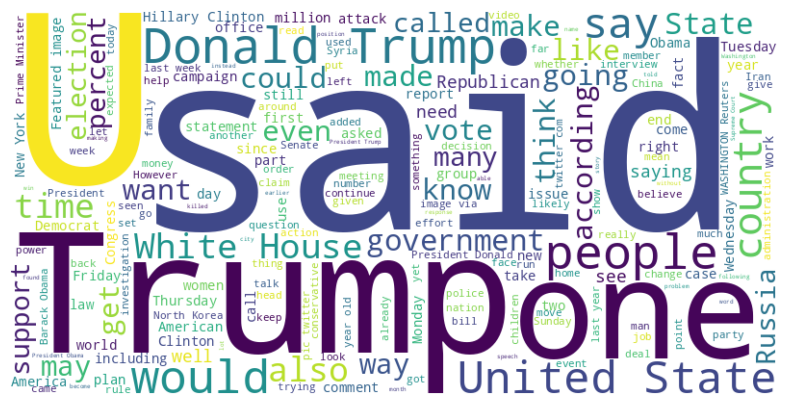

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = " ".join(news_df['text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()